> # Essential Math for AI Chapter 2: Fitting Functions to Data
> # Exploring two different Height_Weight Data Sets From Kaggle
> ## a. We will see how a linear dependency between two variables looks like a straight line
> ## b. We will understand the difference between real data and simulated data
___

## 1. When we load the first data set from [this Kaggle data set](https://www.kaggle.com/yersever/500-person-gender-height-weight-bodymassindex) and plot the weight against the height, it just looks like randomly scattered points with no obvious dependency. More exploration is needed.

We explore the data set and realize that it has overrepresentation of overweight individuals (individuals with Index label 3 or more).

           Height      Weight       Index
count  500.000000  500.000000  500.000000
mean   169.944000  106.000000    3.748000
std     16.375261   32.382607    1.355053
min    140.000000   50.000000    0.000000
25%    156.000000   80.000000    3.000000
50%    170.500000  106.000000    4.000000
75%    184.000000  136.000000    5.000000
max    199.000000  160.000000    5.000000

    Gender  Height  Weight  Index
0    Male     174      96      4
1    Male     189      87      2
2  Female     185     110      4
3  Female     195     104      3
4    Male     149      61      3


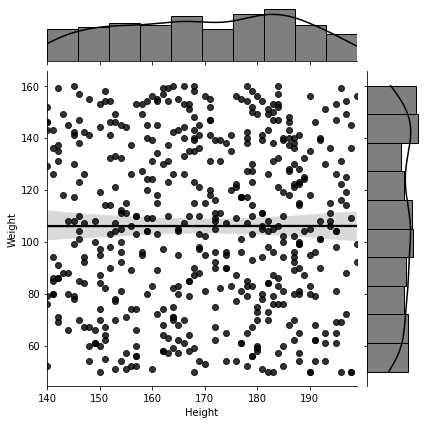

In [72]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

df_hw_biased=pd.read_csv('Height_Weight.csv')
print(df_hw_biased.describe())
print('\n',df_hw_biased.head())

hw_plot=seaborn.jointplot(data=df_hw_biased, x='Height', y='Weight', kind='reg', color='k')
hw_plot.savefig("Fig_height_weight_biased.png")

## 2. Let's split the data into new data frames based on the index category then attempt the weight height plot for each. Simple obversation of the plots suggests that the weight depends linearly on the height. 

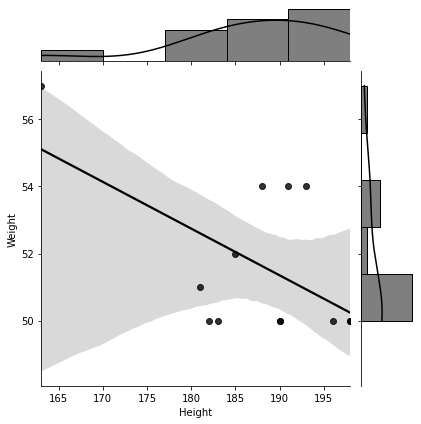

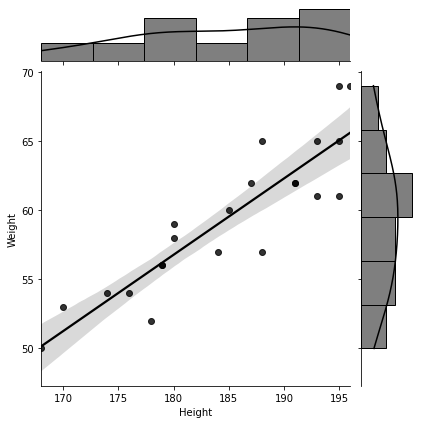

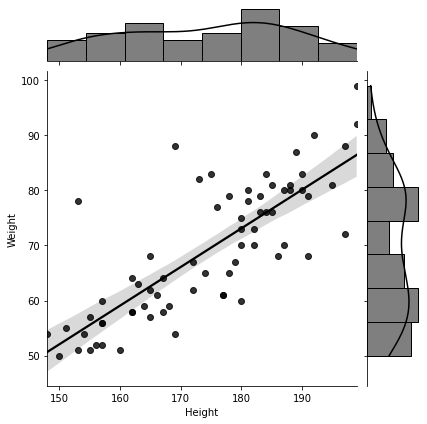

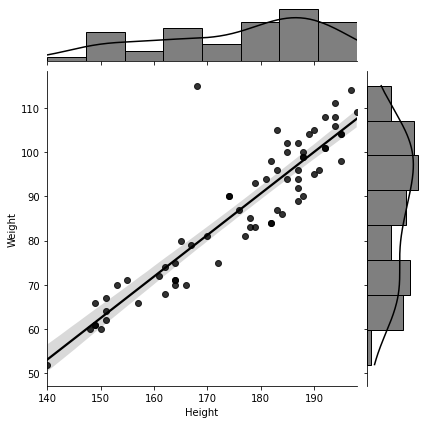

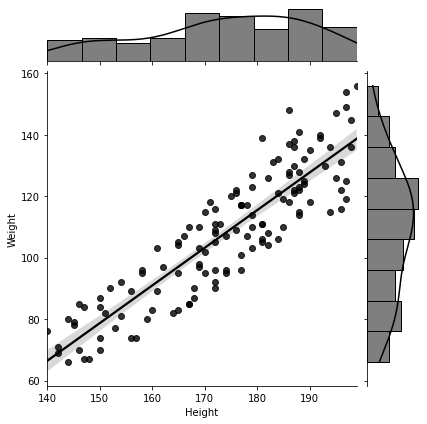

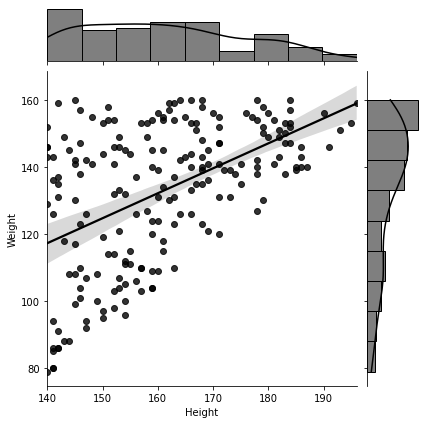

In [73]:
df_hw_biased_0=df_hw_biased[df_hw_biased['Index']==0]
df_hw_biased_1=df_hw_biased[df_hw_biased['Index']==1]
df_hw_biased_2=df_hw_biased[df_hw_biased['Index']==2]
df_hw_biased_3=df_hw_biased[df_hw_biased['Index']==3]
df_hw_biased_4=df_hw_biased[df_hw_biased['Index']==4]
df_hw_biased_5=df_hw_biased[df_hw_biased['Index']==5]

hw_plot=seaborn.jointplot(data=df_hw_biased_0, x='Height', y='Weight', kind='reg', color='k')
hw_plot.savefig("Fig_height_weight_0.png")

hw_plot=seaborn.jointplot(data=df_hw_biased_1, x='Height', y='Weight', kind='reg', color='k')
hw_plot.savefig("Fig_height_weight_1.png")

hw_plot=seaborn.jointplot(data=df_hw_biased_2, x='Height', y='Weight', kind='reg', color='k')
hw_plot.savefig("Fig_height_weight_2.png")

hw_plot=seaborn.jointplot(data=df_hw_biased_3, x='Height', y='Weight', kind='reg', color='k')
hw_plot.savefig("Fig_height_weight_3.png")

hw_plot=seaborn.jointplot(data=df_hw_biased_4, x='Height', y='Weight', kind='reg', color='k')
hw_plot.savefig("Fig_height_weight_4.png")

hw_plot=seaborn.jointplot(data=df_hw_biased_5, x='Height', y='Weight', kind='reg', color='k')
hw_plot.savefig("Fig_height_weight_5.png")

___
# Let's explore a more balanced dataset. Load [this other Height_Weight Kaggle data set](https://www.kaggle.com/mustafaali96/weight-height)

             Height        Weight
count  10000.000000  10000.000000
mean      66.367560    161.440357
std        3.847528     32.108439
min       54.263133     64.700127
25%       63.505620    135.818051
50%       66.318070    161.212928
75%       69.174262    187.169525
max       78.998742    269.989699

   Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801


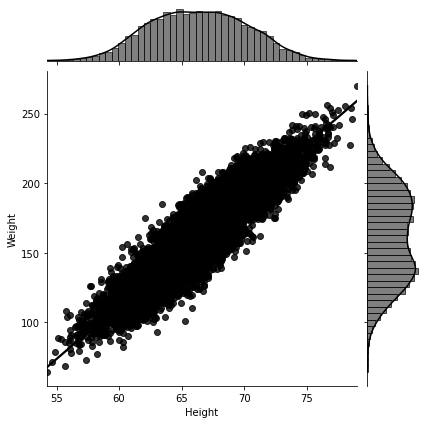

In [147]:
df=pd.read_csv('weight-height.csv')

print(df.describe())
print('\n',df.head())

hw_plot=seaborn.jointplot(data=df, x='Height', y='Weight', kind='reg', color='k')
hw_plot.savefig("Fig_height_weight.png")

# Let's separate the above data set by gender


 Male data description 
             Height       Weight
count  5000.000000  5000.000000
mean     69.026346   187.020621
std       2.863362    19.781155
min      58.406905   112.902939
25%      67.174679   173.887767
50%      69.027709   187.033546
75%      70.988744   200.357802
max      78.998742   269.989699

 
 Female data description 
             Height       Weight
count  5000.000000  5000.000000
mean     63.708774   135.860093
std       2.696284    19.022468
min      54.263133    64.700127
25%      61.894441   122.934096
50%      63.730924   136.117583
75%      65.563565   148.810926
max      73.389586   202.237214


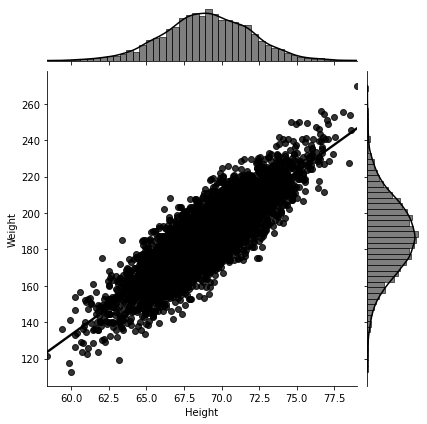

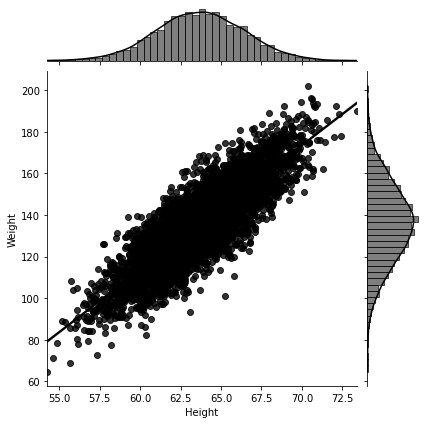

In [153]:
df_M=df[df['Gender']=='Male']
df_F=df[df['Gender']=='Female']

print('\n Male data description \n',df_M.describe())
M_plot=seaborn.jointplot(data=df_M, x='Height', y='Weight', kind='reg', color='k')
M_plot.savefig("Fig_height_weight_M.png")

print('\n \n Female data description \n',df_F.describe())
F_plot=seaborn.jointplot(data=df_F, x='Height', y='Weight', kind='reg', color='k')
F_plot.savefig("Fig_height_weight_F.png")

# Now let's simulate our own data set. Unlike real data, for a simulated data set, we know the function that created the data set, and the probability distribution of any involved randomness or noise. 

We hypothesize that the weight of an individual depends linearly on the height. 

$$weight=\omega_0+\omega_1\times height$$

But we have to come up with values for the weights $\omega_0$ and $\omega_1$. Let's try to simulate data similar to the real female data above. For this we use $\omega_0=-314.5$ and and $\omega_1=7.07$, then add some noise sampled from the normal distribution.


 
 Simulated Female data description 
             Height       Weight
count  5000.000000  5000.000000
mean     63.761500   136.312904
std       2.692299    19.145095
min      54.181042    67.409248
25%      61.932513   123.250652
50%      63.721902   136.157485
75%      65.511004   148.739444
max      73.202255   205.563336

 
 Female data description 
             Height       Weight
count  5000.000000  5000.000000
mean     63.708774   135.860093
std       2.696284    19.022468
min      54.263133    64.700127
25%      61.894441   122.934096
50%      63.730924   136.117583
75%      65.563565   148.810926
max      73.389586   202.237214


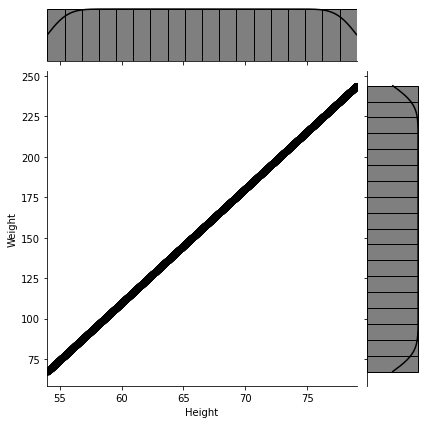

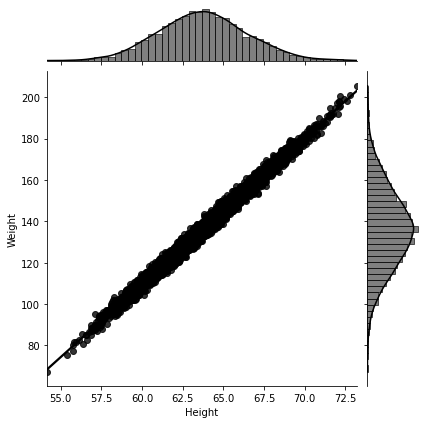

In [169]:
# number of data points
N=5000

# weights or parameters of the linear model
w0=-314.5
w1=7.07

# height samples and weight as a linear function of height
height=np.linspace(54, 79, N, endpoint=True)
weight=w0+w1*height

# create a data frame containing our data
d={'Height':height, 'Weight':weight}
df = pd.DataFrame(d)

# plot the data points
hw_plot=seaborn.jointplot(data=df, x='Height', y='Weight', kind='reg', color='k')
hw_plot.savefig("Fig_height_weight_sim.png")

# Now simulate height data sampled from the normal distribution with mean and standard deviation similar to the female data above
height_n=2.69*np.random.randn(N,)+63.7

# Calculate the weight and add noise also sampled from a normal distribution with mean zero and standard deviation 2
weight_n=w0+w1*height_n+2*np.random.randn(N,)

# convert samples to pandas data frame
d={'Height':height_n,'Weight':weight_n}
hw_df_n=pd.DataFrame(d) 
print('\n \n Simulated Female data description \n',hw_df_n.describe())
print('\n \n Female data description \n',df_F.describe())

# plot the data points
hw_plot_n=seaborn.jointplot(data=hw_df_n, x='Height', y='Weight', kind='reg', color='k')
hw_plot_n.savefig("Fig_height_weight_sim_noise.png")